# Supervised Learning : DECISION TREES

Decision trees are machine learning models that try to find patterns in the features of data points. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'accep'])

In [3]:
print(df.head())

  buying  maint doors persons lug_boot safety  accep
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [4]:
df['accep'] = ~(df['accep']=='unacc') #1 is acceptable, 0 if not acceptable

In [5]:
X = pd.get_dummies(df.iloc[:,0:6])
y = df['accep']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.3)

In [12]:
## 1. Create a decision tree and print the parameters
dtree = DecisionTreeClassifier(max_depth=3)
print(f'Decision Tree parameters: {dtree.get_params()}')

Decision Tree parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [13]:
## 2. Fit decision tree on training set and print the depth of the tree
dtree.fit(x_train,y_train)
print(f'Decision tree depth: {dtree.get_depth()}')

Decision tree depth: 3


In [14]:
## 3. Predict on test data and accuracy of model on test set
y_pred = dtree.predict(x_test)

print(f'Test set accuracy: {dtree.score(x_test,y_test)}') # or accuracy_score(y_test, y_pred)

Test set accuracy: 0.8728323699421965


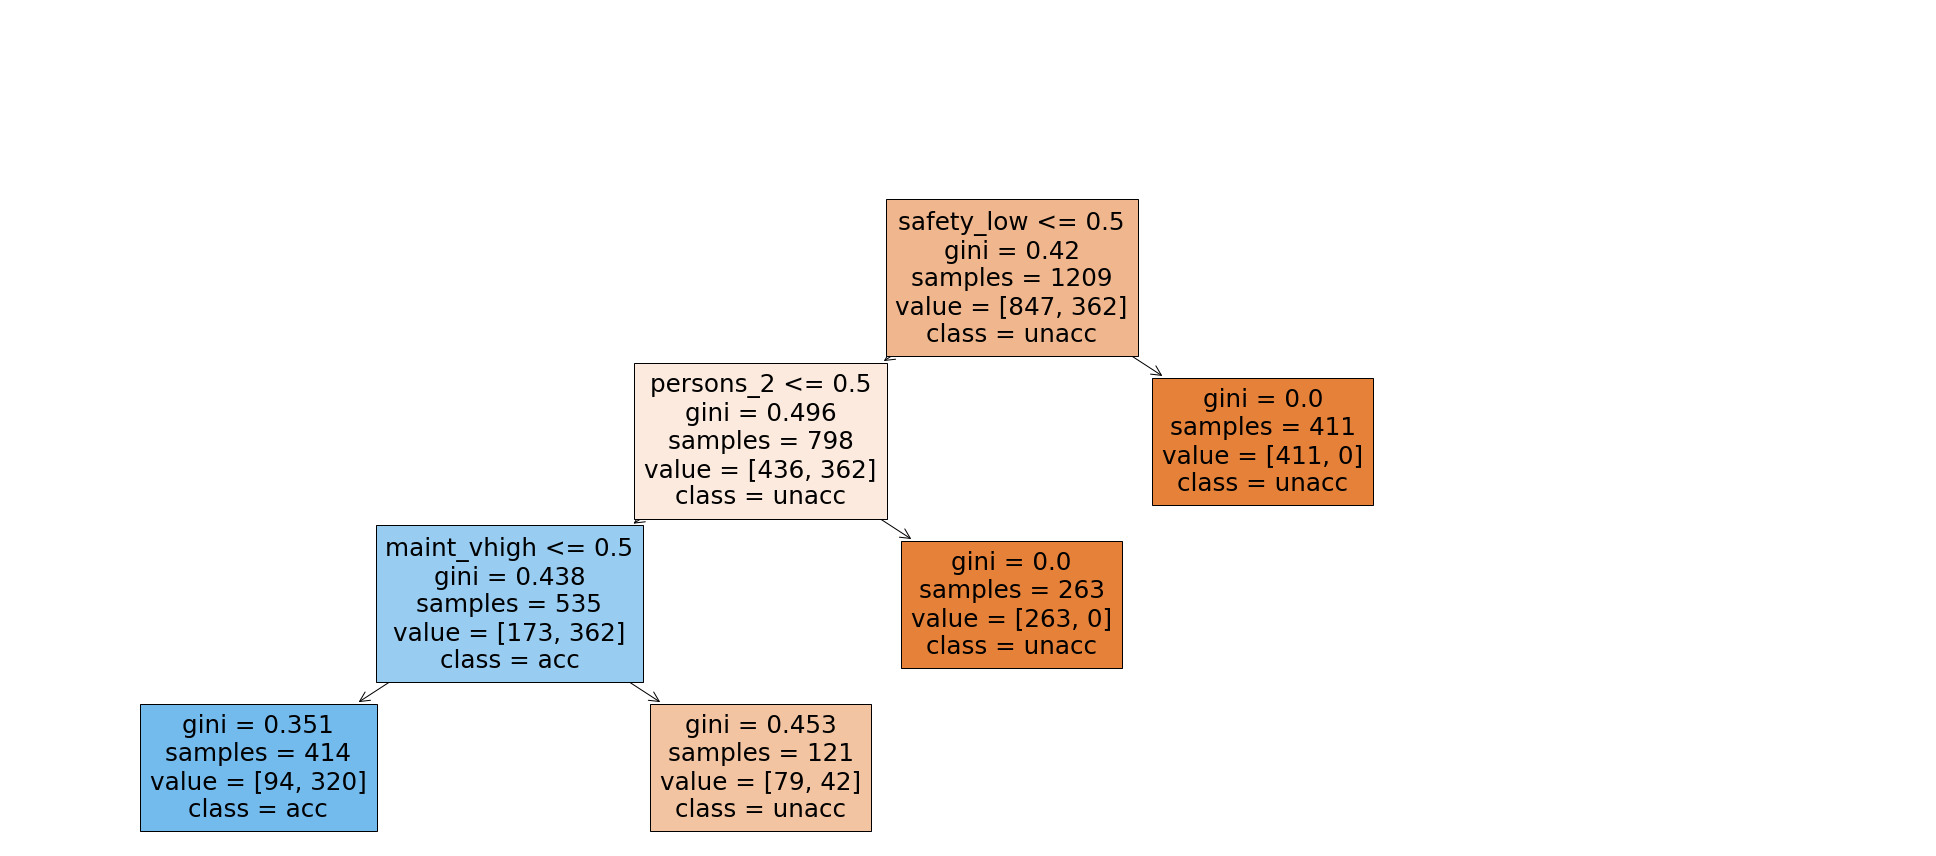

|--- safety_low <= 0.50
|   |--- persons_2 <= 0.50
|   |   |--- maint_vhigh <= 0.50
|   |   |   |--- class: True
|   |   |--- maint_vhigh >  0.50
|   |   |   |--- class: False
|   |--- persons_2 >  0.50
|   |   |--- class: False
|--- safety_low >  0.50
|   |--- class: False



In [15]:
## Visualizing the tree
plt.figure(figsize=(27,12))
tree.plot_tree(dtree, feature_names = x_train.columns, class_names = ['unacc','acc'], filled=True)
plt.tight_layout()
plt.show()

## Text-based visualization of the tree (View this in the Output terminal!)
print(tree.export_text(dtree, feature_names = x_train.columns.tolist()))

## Advantages and Disadvantages of Decision Trees

As we have seen already, decision trees are easy to understand, fully explainable, and have a natural way to visualize the decision making process. In addition, often little modification needs to be made to the data prior to modeling (such as scaling, normalization, removing outliers) and decision trees are relatively quick to train and predict. However, now let’s talk about some of their limitations.

One problem with the way we’re currently making our decision trees is that our trees aren’t always globally optimal. This means that there might be a better tree out there somewhere that produces better results. But wait, why did we go through all that work of finding information gain if it’s not producing the best possible tree?

Our current strategy of creating trees is greedy. We assume that the best way to create a tree is to find the feature that will result in the largest information gain right now and split on that feature. We never consider the ramifications of that split further down the tree. It’s possible that if we split on a suboptimal feature right now, we would find even better splits later on. Unfortunately, finding a globally optimal tree is an extremely difficult task, and finding a tree using our greedy approach is a reasonable substitute.

Another problem with our trees is that they are prone to overfit the data. This means that the structure of the tree is too dependent on the training data and may not generalize well to new data. In general, larger trees tend to overfit the data more. As the tree gets bigger, it becomes more tuned to the training data and it loses a more generalized understanding of the real world data.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.3)

## 1. Two decision trees
dtree1 = DecisionTreeClassifier()
dtree2 = DecisionTreeClassifier(max_depth = 7)

## Fit first decision tree
dtree1.fit(x_train, y_train)
dtree1_depth = dtree1.get_depth()
print(f'First Decision Tree depth: {dtree1_depth}')

## Fit second decision tree
dtree2.fit(x_train, y_train)
dtree2_depth = dtree2.get_depth()
print(f'Second Decision Tree depth: {dtree2_depth}')

## 2. Calculate accuracy scores on test data for both trees
dtree1_score = dtree1.score(x_test, y_test)
print(f'Test set accuracy tree no max depth: {dtree1_score}')# or accuracy_score(y_test, y_pred)

dtree2_score = dtree2.score(x_test, y_test)
print(f'Test set accuracy tree max depth 7: {dtree2_score}')# or accuracy_score(y_test, y_pred)


First Decision Tree depth: 11
Second Decision Tree depth: 7
Test set accuracy tree no max depth: 0.9826589595375722
Test set accuracy tree max depth 7: 0.9730250481695568
